# Pipeline Speed Test

In [68]:
import sys
sys.path.insert(0, '..')
import time

import matplotlib.pyplot as plt

%matplotlib inline

In [69]:
from lib.segmentation import segmentation_adjacency, FormFeatureExtraction
from lib.segmentation.feature_extraction import form_feature_extraction
from lib.graph import coarsen_adj, perm_features

def pipeline(image, segmentation_algorithm):
    t_segmentation = time.process_time()
    segmentation = segmentation_algorithm(image)
    t_segmentation = time.process_time() - t_segmentation
    
    t_adjacency = time.process_time()
    adj, points, mass = segmentation_adjacency(segmentation)
    t_adjacency = time.process_time() - t_adjacency
    
    t_coarsen = time.process_time() 
    adjs_dist, adjs_rad, perm = coarsen_adj(adj, points, mass, levels=4)
    t_coarsen = time.process_time() - t_coarsen
    
    t_features = time.process_time()
    features = FormFeatureExtraction(segmentation).get_features()
    t_features = time.process_time() - t_features
    
    t_perm = time.process_time()
    features = perm_features(features, perm)
    t_perm = time.process_time() - t_perm
    
    t_all = t_segmentation + t_adjacency + t_coarsen + t_features + t_perm
    
    p_segmentation = 100 * t_segmentation / t_all
    p_adjacency = 100 * t_adjacency / t_all
    p_coarsen = 100 * t_coarsen / t_all
    p_features = 100 * t_features / t_all
    p_perm = 100 * t_perm / t_all
    
    print('Number of nodes: {}'.format(features.shape[0]))
    print('Execution time: {:.5f}s'.format(t_all))
    print('0. Segmentation: {:.5f}s, {:.2f}%'.format(t_segmentation, p_segmentation))
    print('1. Adjacency generation: {:.5f}s, {:.2f}%'.format(t_adjacency, p_adjacency))
    print('2. Coarsening: {:.5f}s, {:.2f}%'.format(t_coarsen, p_coarsen))
    print('3. Feature extraction: {:.5f}s, {:.2f}%'.format(t_features, p_features))
    print('4. Feature permutation: {:.5f}s, {:.2f}%'.format(t_perm, p_perm))
    
    plt.bar(range(5), [p_segmentation, p_adjacency, p_coarsen, p_features, p_perm], color="black")
    plt.ylabel('Percentage')

## Load Datasets

In [70]:
from lib.datasets import MNIST, Cifar10, PascalVOC

mnist = MNIST('../data/mnist').test.next_batch(1, shuffle=False)[0][0]
cifar_10 = Cifar10('../data/cifar_10').test.next_batch(2, shuffle=False)[0][1]
pascal_voc = PascalVOC('../test_data').test.next_batch(3, shuffle=False)[0][2]

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz
>> Reading ../test_data/VOCdevkit/VOC2012 100.00%


In [71]:
from lib.segmentation import slic_fixed, quickshift_fixed

## MNIST SLIC

Number of nodes: 80
Execution time: 0.01604s
0. Segmentation: 0.00430s, 26.79%
1. Adjacency generation: 0.00057s, 3.52%
2. Coarsening: 0.00940s, 58.62%
3. Feature extraction: 0.00175s, 10.92%
4. Feature permutation: 0.00002s, 0.14%


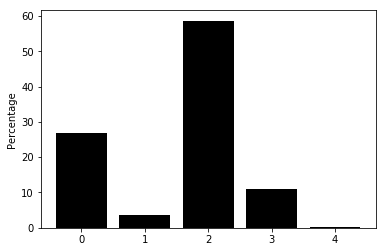

In [72]:
slic = slic_fixed(num_segments=100, compactness=5, max_iterations=10, sigma=0)
pipeline(mnist, slic)

## MNIST Quickshift

Number of nodes: 96
Execution time: 0.02267s
0. Segmentation: 0.01058s, 46.65%
1. Adjacency generation: 0.00062s, 2.72%
2. Coarsening: 0.00977s, 43.11%
3. Feature extraction: 0.00168s, 7.42%
4. Feature permutation: 0.00002s, 0.11%


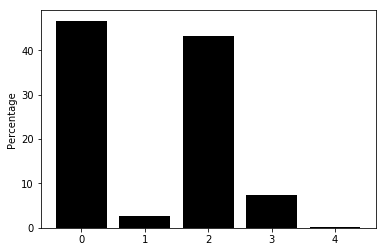

In [73]:
quickshift = quickshift_fixed(ratio=1, kernel_size=2, max_dist=2, sigma=0)
pipeline(mnist, quickshift)

## Cifar10 SLIC

Number of nodes: 144
Execution time: 0.01876s
0. Segmentation: 0.00377s, 20.11%
1. Adjacency generation: 0.00071s, 3.80%
2. Coarsening: 0.01232s, 65.66%
3. Feature extraction: 0.00193s, 10.29%
4. Feature permutation: 0.00003s, 0.15%


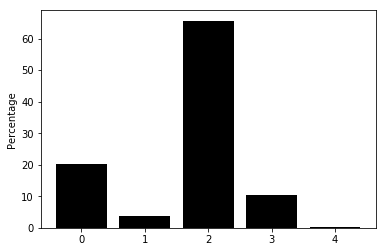

In [74]:
slic = slic_fixed(num_segments=150, compactness=5, max_iterations=10, sigma=0)
pipeline(cifar_10, slic)

## Cifar10 Quickshift

Number of nodes: 208
Execution time: 0.02595s
0. Segmentation: 0.00934s, 35.98%
1. Adjacency generation: 0.00072s, 2.78%
2. Coarsening: 0.01398s, 53.90%
3. Feature extraction: 0.00187s, 7.22%
4. Feature permutation: 0.00003s, 0.11%


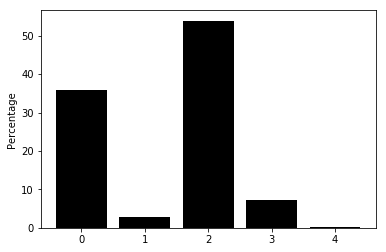

In [75]:
quickshift = quickshift_fixed(ratio=1, kernel_size=1, max_dist=5, sigma=0)
pipeline(cifar_10, quickshift)

## PascalVOC SLIC

Number of nodes: 944
Execution time: 0.35826s
0. Segmentation: 0.22831s, 63.73%
1. Adjacency generation: 0.01207s, 3.37%
2. Coarsening: 0.03579s, 9.99%
3. Feature extraction: 0.08126s, 22.68%
4. Feature permutation: 0.00083s, 0.23%


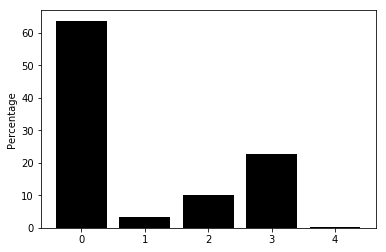

In [76]:
slic = slic_fixed(num_segments=800, compactness=30, max_iterations=10, sigma=0)
pipeline(pascal_voc, slic)

## PascalVOC Quickshift

Number of nodes: 560
Execution time: 1.46164s
0. Segmentation: 1.34259s, 91.85%
1. Adjacency generation: 0.01104s, 0.76%
2. Coarsening: 0.02882s, 1.97%
3. Feature extraction: 0.07914s, 5.41%
4. Feature permutation: 0.00006s, 0.00%


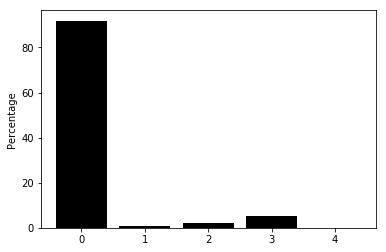

In [77]:
quickshift = quickshift_fixed(ratio=1, kernel_size=3, max_dist=15, sigma=0)
pipeline(pascal_voc, quickshift)